In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
zoo = pd.read_csv("./zoo/zoo.data", header=None)
zoo.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
#Adding Column Names to the Dataset
zoo.columns = [
    "animal name",
    "hair",
    "feathers",
    "eggs",
    "milk",
    "airborne",
    "aquatic",
    "predator",
    "toothed",
    "backbone",
    "breathes",
    "venomous",
    "fins",
    "legs",
    "tail",
    "domestic",
    "catsize",
    "type",
]

In [5]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
zoo.drop("animal name", axis = 1, inplace=True)

In [8]:
#Checking whether the dataset contains any null values
print(zoo.isna().values.any())
print(zoo.isnull().values.any())

False
False


In [9]:
correlation_matrix = zoo.corr()
correlation_matrix["type"]

hair       -0.562384
feathers   -0.197520
eggs        0.661825
milk       -0.723683
airborne    0.022677
aquatic     0.326639
predator    0.061179
toothed    -0.471527
backbone   -0.828845
breathes   -0.519308
venomous    0.321476
fins        0.099430
legs        0.131693
tail       -0.631830
domestic   -0.181043
catsize    -0.521030
type        1.000000
Name: type, dtype: float64

In [10]:
#Separating the Independent and the Dependent Variables
X = zoo.drop("type", axis=1)
X = X.values
y = zoo["type"]
y = y.values

In [11]:
#Creating an numpy array for the data points obtained from the correlation matrix
new_data_point = np.array([
    -0.562384,
    -0.197520,
    0.661825,
    -0.723683,
    0.022677,
    0.326639,
    0.061179,
    -0.471527,
    -0.828845,
    -0.519308,
    0.321476,
    0.099430,
    0.131693,
    -0.631830,
    -0.181043,
    -0.521030,
])

In [12]:
#Calculating the Distance between the new datapoint and the each of the datapoints in the zoo dataset
#the length of the vector is called the norm. The norm is a positive value that indicates the magnitude of the vector.
distances = np.linalg.norm(X - new_data_point, axis =1) #This will give the vector of distances

In [15]:
#Keeping the Number of neighbors to be 5 (k = 5)
#We are going to sort the distances from lowest to highest using argsort

k = 5
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids #These five neighbors are closer to the target variable

array([13, 77, 99, 81, 73], dtype=int64)

In [14]:
#Combining those neighbors for prediction
#finding the ground truth
nearest_neighbor_type = y[nearest_neighbor_ids]
nearest_neighbor_type

array([7, 7, 7, 7, 4], dtype=int64)

Prediction

Mean for Regression

In [60]:
#Prediction - Regression
Mean_regul = nearest_neighbor_type.mean()
Mean_regul # This means that the 5-Nearest Neighbor prediction for the new data point is the value we get

6.4

Mode for Classification

In [89]:
#To calculate Mode

def calculate_Mode(arr):
    count = {}
    max_count = 0
    mode = None
    for item in arr:
        if item in count:
            count[item] += 1
        else:
            count[item] = 1
        if count[item] > max_count:
            max_count = count[item]
            mode = item
    return mode

class_neighbors = np.array(zoo['type'])
mode_value_regul = calculate_Mode(class_neighbors)
print("Mode: ", mode_value_regul)


Mode:  1


Fitting the KNN Model

In [20]:
#Splitting the Datast into Training and Test Datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123456)

In [21]:
#For Regressor
from sklearn.neighbors import KNeighborsRegressor
knn_model_regression = KNeighborsRegressor(n_neighbors=5) #This is the Value of K
knn_model_regression.fit(X_train, y_train)

KNeighborsRegressor()

In [22]:
#For Classification
from sklearn.neighbors import KNeighborsClassifier
knn_model_classification = KNeighborsClassifier(n_neighbors=5)
knn_model_classification.fit(X_train, y_train)

KNeighborsClassifier()

Evaluating the Model - Regression

In [23]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
y_pred_regression = knn_model_regression.predict(X_test)
mae_regression = mean_absolute_error(y_test, y_pred_regression)
print("Mean Absolute Error (MAE): ", mae_regression)

Mean Absolute Error (MAE):  0.296774193548387


In [24]:
#Root Mean Square Error (RMSE)

from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model_regression.predict(X_train)
mse_train = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_train)
print("RMSE on Train Data: ",rmse_train)

mse_test = mean_squared_error(y_test, y_pred_regression)
rmse_test = sqrt(mse_test)
print("RMSE on Test Data: ", rmse_test)

RMSE on Train Data:  0.4484895284651105
RMSE on Test Data:  0.8222706563279906


In [25]:
#R-Squared (R2) Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_regression)
print("R-Squared (R2) Score: ", r2)

R-Squared (R2) Score:  0.8178923766816144


Evaluating the Model - Classification

In [27]:
#Accuracy Score
from sklearn.metrics import accuracy_score
y_pred_classification = knn_model_classification.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_classification)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.8709677419354839


In [28]:
#Confusion Matrix - For Evaluating Class-Wise Performance

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classification)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[11  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  3  0  0  0]]


In [29]:
#Classification Report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_classification)
print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         3

    accuracy                           0.87        31
   macro avg       0.64      0.71      0.67        31
weighted avg       0.81      0.87      0.83        31



Choosing the Best K value

In [30]:
#Getting the Accruacy Scores for differect values of n

from sklearn.model_selection import cross_val_score
k_list = np.arange(1, 50, 2)
accuracy_list = []
mean_scores = []
error_rate = []

X_train_np = np.ascontiguousarray(X_train)
y_train_np = np.ascontiguousarray(y_train)
X_test_np = np.ascontiguousarray(X_test)

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_np, y_train_np)
    pred_i = knn.predict(X_test_np)
    score = cross_val_score(knn, X_train_np, y_train_np, cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))
    accuracy = accuracy_score(y_test, pred_i)
    accuracy_list.append(accuracy)

accuracy_data = pd.DataFrame({'k': k_list, 'Accuracy': accuracy_list})
print(accuracy_data)

     k  Accuracy
0    1  1.000000
1    3  0.903226
2    5  0.870968
3    7  0.870968
4    9  0.838710
5   11  0.838710
6   13  0.838710
7   15  0.838710
8   17  0.838710
9   19  0.838710
10  21  0.838710
11  23  0.838710
12  25  0.741935
13  27  0.612903
14  29  0.580645
15  31  0.516129
16  33  0.483871
17  35  0.483871
18  37  0.483871
19  39  0.354839
20  41  0.354839
21  43  0.354839
22  45  0.354839
23  47  0.354839
24  49  0.354839


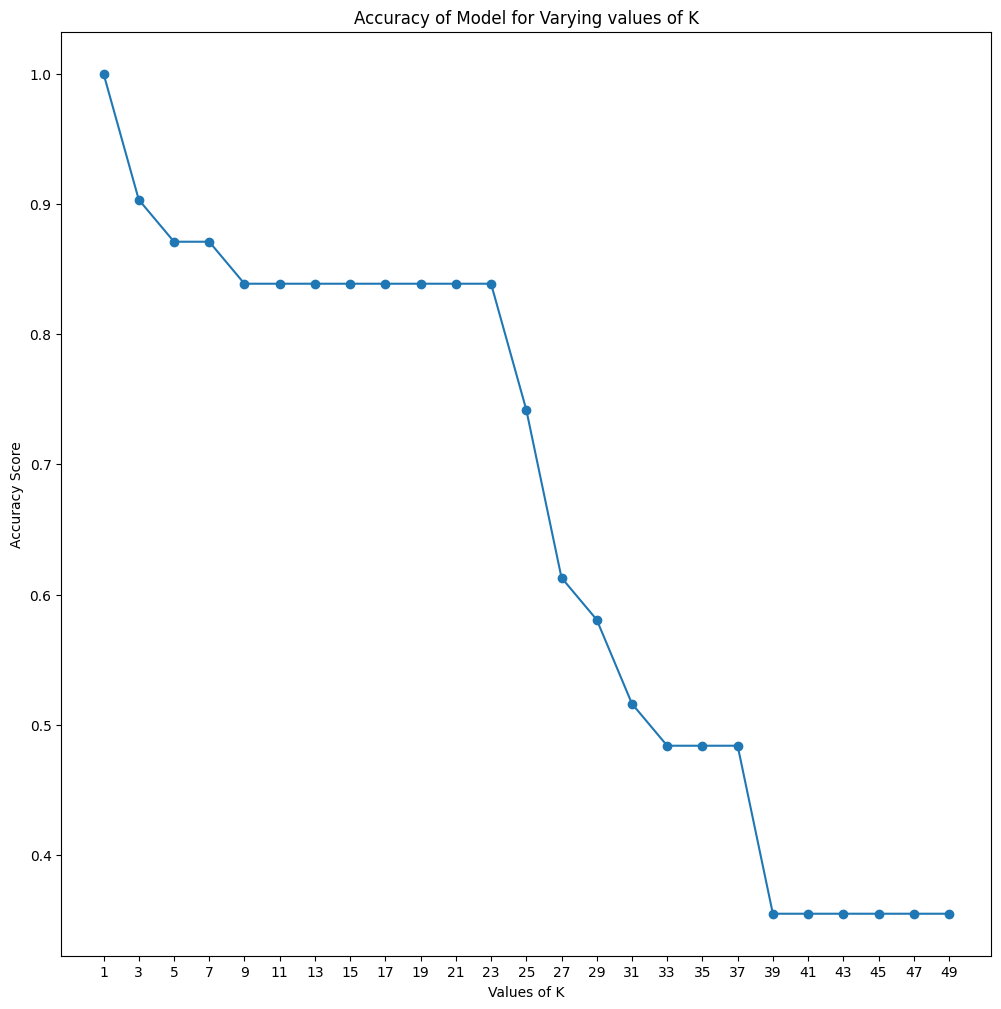

<Figure size 1200x1200 with 0 Axes>

In [87]:
#Visualization of Model performance of Different k values

#Plot n values and accuracy scores
plt.plot(k_list, accuracy_list, marker='o')
plt.title('Accuracy of Model for Varying values of K')
plt.xlabel('Values of K')
plt.ylabel("Accuracy Score")
plt.xticks(k_list)
plt.figure(figure=(10, 6))
plt.show()

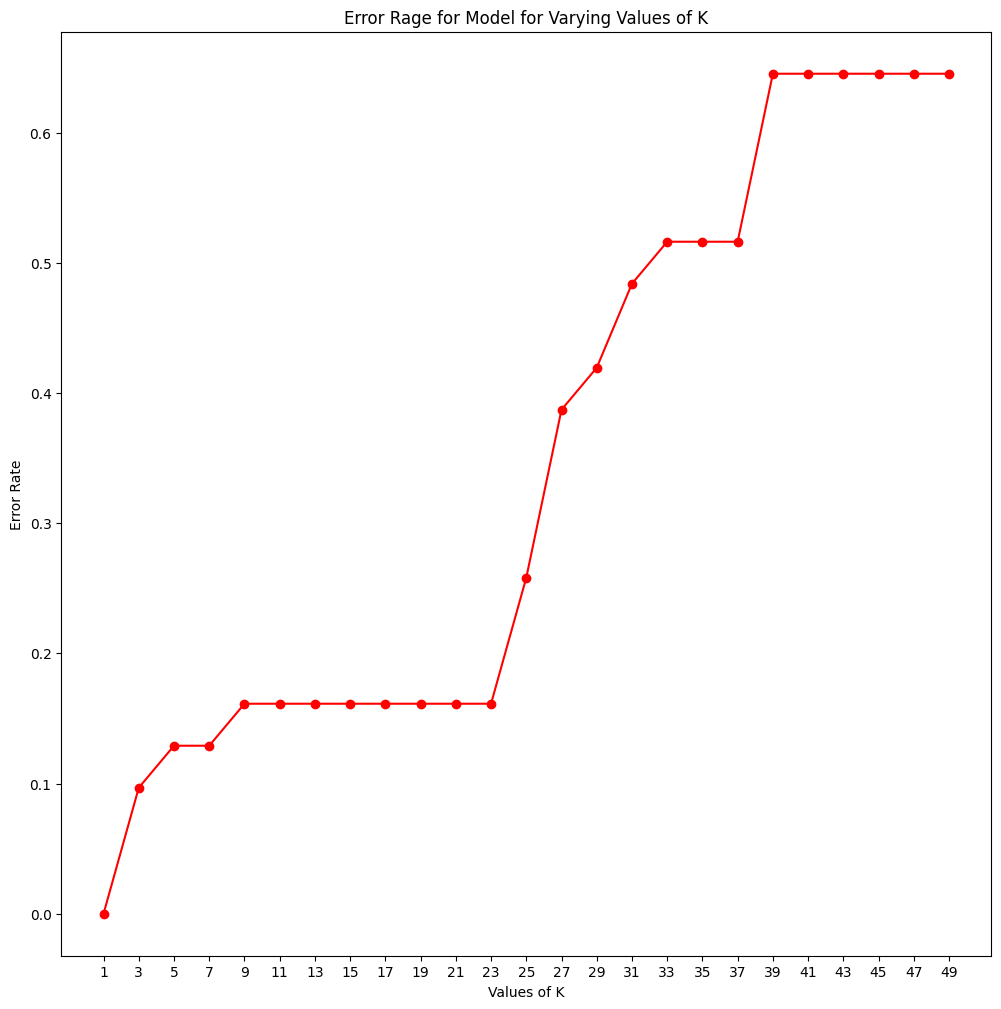

<Figure size 1200x1200 with 0 Axes>

In [88]:
#Plotting K values against the error rate
plt.plot(k_list, error_rate, color='red', marker='o')
plt.title('Error Rage for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.figure(figure=(10, 6))
plt.show()

Other Variants of KNN

Weighted KNN

In [37]:
distances = np.linalg.norm(X-new_data_point, axis=1)
distances

array([5.70251332, 5.82277221, 3.46514995, 5.70251332, 5.89765362,
       5.82277221, 5.93858251, 3.53436107, 3.46514995, 5.56426475,
       5.89765362, 4.15479508, 3.46514995, 1.99874916, 4.39183062,
       6.22586574, 4.09608083, 5.82277221, 3.74824281, 4.34268997,
       4.15479508, 4.03075157, 5.82277221, 4.23583477, 6.29091855,
       5.09190889, 5.12684934, 4.61996041, 5.82277221, 4.7336578 ,
       6.36634135, 5.93858251, 4.49085606, 4.13818803, 3.33610884,
       5.76408728, 5.64469806, 4.09608083, 3.46514995, 6.66139656,
       6.53108492, 3.97784266, 6.43490048, 3.98751002, 5.89765362,
       5.89765362, 6.22586574, 5.89765362, 5.92697564, 5.72191036,
       5.89765362, 6.53108492, 5.30953823, 8.26297115, 5.72191036,
       5.82277221, 4.12160772, 4.15479508, 4.26755365, 3.98751002,
       3.74824281, 3.46514995, 3.64075077, 5.73256803, 5.89765362,
       5.93858251, 4.34268997, 5.89765362, 6.01202164, 5.89765362,
       5.93858251, 4.22673541, 8.41848467, 3.33610884, 4.32666

In [38]:
k = 5
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([13, 77, 99, 81, 73], dtype=int64)

In [42]:
#Calculating the Weight - Classification
weights = 1/distances[nearest_neighbor_ids]
weights

array([0.50031291, 0.46132606, 0.44039737, 0.44039737, 0.29975041])

In [53]:
#Calculating Weighted Sum for Regression
weighted_sum = np.sum(weights * y[nearest_neighbor_ids])
weighted_mean = weighted_sum / np.sum(weights)
weighted_mean #Prediction

6.58021757881094

In [54]:
#Calculating Weighted Voting for Classification

class_votes = {}
for neighbor_id, weight in zip(nearest_neighbor_ids, weights):
    neighbor_class = y[neighbor_id]
    if neighbor_class in class_votes:
        class_votes[neighbor_class] += weight
    else:
        class_votes[neighbor_class] = weight
max_weight_class = max(class_votes, key=class_votes.get)
max_weight_class #The class with the highest cumulative class - Prediction

7

In [70]:
#Fitting the Model

weighted_knn_Model = KNeighborsClassifier(n_neighbors=5)
weighted_knn_Model.fit(X_train, y_train)
y_pred_weighted_KNN = weighted_knn_Model.predict(X_test)

In [71]:
#Calculating the Accuracy
accuracy_weighted_KNN = accuracy_score(y_test, y_pred_weighted_KNN)
accuracy_weighted_KNN

0.8709677419354839

Nearest Centroid Classifier

In [66]:
#Calculating the centroid

centroids = zoo.groupby('type').mean() #Grouping the Dataset by the mean of the type variable

def find_nearest_centroid(data_point, centroids):
    min_distance = float('inf')
    nearest_centroid = None
    for centroid_type, centroid in centroids.iterrows():
        distance = np.linalg.norm(data_point - centroid)
        if distance < min_distance:
            min_distance = distance
            nearest_centroid = centroid_type
    return nearest_centroid

In [67]:
predicted_labels = []

for i in range(len(X_test)):
    data_point = X_test[i]
    nearest_centroid = find_nearest_centroid(data_point, centroids)
    predicted_labels.append(nearest_centroid)

predicted_labels

[4,
 1,
 2,
 2,
 2,
 4,
 2,
 2,
 1,
 2,
 1,
 3,
 4,
 2,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 5,
 1,
 2,
 1,
 4,
 2,
 6,
 3,
 1]

In [72]:
#Calculating the Accuracy
accuracy_nearest_centroid = accuracy_score(y_test, predicted_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))

report = classification_report(y_test, predicted_labels)
print("Classification Report: \n", report)

Accuracy: 90.32%
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10
           3       0.33      1.00      0.50         1
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         3

    accuracy                           0.90        31
   macro avg       0.73      0.86      0.77        31
weighted avg       0.86      0.90      0.87        31



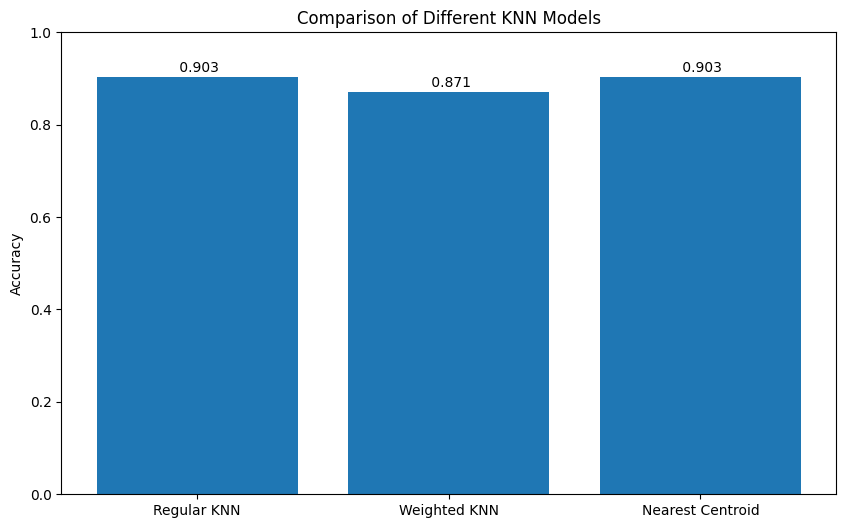

In [85]:
#Comparison of the Models

model_names = ['Regular KNN', 'Weighted KNN', 'Nearest Centroid']
accuracy_scores = [accuracy, accuracy_weighted_KNN, accuracy_nearest_centroid]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores)
plt.title("Comparison of Different KNN Models")
plt.ylabel('Accuracy')
plt.ylim(0,1) #Setting the y-axos limit to ensure the same scale
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.01, f'{accuracy: .3f}', ha='center')
plt.show()